Helene Burgess and Yusuf Olodo

As outlined in the project scoping document, our task is to predict the sales price of houses as accurately as possible using a multivariate linear regression.

Our approach will involve the following steps:

1) Hypothesising about the data - without looking at the data in any detail, thinking about which features may influence our target (sales price)

2) Carrying out initial exploratory analysis to get a feel for the data and plotting our first charts to explore whether the features we hypothesised about are meaningful and whether their influence on sales price is worth exploring further

3) Cleaning the data, based on the features we are interested in exploring (meaning it will be easier to manipulate), getting rid of any outliers and dropping null values or replacing them with meaningful or placeholder values instead

4) Exploring differences in subsets of the data, to see if there are meaningful differences between them

5) Undertaking linear regression using different features to see which (combination) most accurately predicts sales price.

**Step 1: Hypotheses about our data**

In [1]:
import pandas as pd

import numpy as np

from matplotlib import pyplot as plt

%matplotlib inline

import seaborn as sns

df = pd.read_csv("kc_house_data.csv")

In [2]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,...,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


In [3]:
df.shape

(21597, 21)

In [4]:
df.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

As can be seen from an overview of the data we have available, there are a number of features which we think might have a positive effect on the sales price of a house: number of bedrooms or bathrooms in a house; the size of the living space; whether or not the house has a view of the waterfront; the condition it is in; the grade it was given; the year it was renovated; and its zipcode (the area it is in). We will now explore these features a little more.

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
id               21597 non-null int64
date             21597 non-null object
price            21597 non-null float64
bedrooms         21597 non-null int64
bathrooms        21597 non-null float64
sqft_living      21597 non-null int64
sqft_lot         21597 non-null int64
floors           21597 non-null float64
waterfront       19221 non-null float64
view             21534 non-null float64
condition        21597 non-null int64
grade            21597 non-null int64
sqft_above       21597 non-null int64
sqft_basement    21597 non-null object
yr_built         21597 non-null int64
yr_renovated     17755 non-null float64
zipcode          21597 non-null int64
lat              21597 non-null float64
long             21597 non-null float64
sqft_living15    21597 non-null int64
sqft_lot15       21597 non-null int64
dtypes: float64(8), int64(11), object(2)
memory usage: 3.5+ MB


The .info() function gives us a concise summary of our table - we can see that there are 21597 rows of data (entries or houses). However, it also tells us that three of the features are missing values: waterfront; view; and year renovated. We will need to decide, when cleaning our data, whether or not to drop these missing values or replace them with meaningful/useful alternatives.

In [6]:
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.159700e+04,2.159700e+04,21597.000000,21597.000000,21597.000000,2.159700e+04,21597.000000,19221.000000,21534.000000,21597.000000,21597.000000,21597.000000,21597.000000,17755.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000
mean,4.580474e+09,5.402966e+05,3.373200,2.115826,2080.321850,1.509941e+04,1.494096,0.007596,0.233863,3.409825,7.657915,1788.596842,1970.999676,83.636778,98077.951845,47.560093,-122.213982,1986.620318,12758.283512
std,2.876736e+09,3.673681e+05,0.926299,0.768984,918.106125,4.141264e+04,0.539683,0.086825,0.765686,0.650546,1.173200,827.759761,29.375234,399.946414,53.513072,0.138552,0.140724,685.230472,27274.441950
min,1.000102e+06,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,3.000000,370.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.220000e+05,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,1951.000000,0.000000,98033.000000,47.471100,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,1975.000000,0.000000,98065.000000,47.571800,-122.231000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068500e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


Using the describe function gives us a statistical description of the dataframe. Combining this with analysis of some of the factors below will give us a better feel for the data.

In [7]:
df.duplicated(subset=None, keep='first')

duplicated_rows_df = df[df.duplicated()]

print(duplicated_rows_df)

Empty DataFrame
Columns: [id, date, price, bedrooms, bathrooms, sqft_living, sqft_lot, floors, waterfront, view, condition, grade, sqft_above, sqft_basement, yr_built, yr_renovated, zipcode, lat, long, sqft_living15, sqft_lot15]
Index: []

[0 rows x 21 columns]


This tells us that there are no duplicate rows based on all columns in the dataframe - we don't need to worry about deleting rows which are exact duplicates of each other for all columns.

**Step 2: Exploratory data analysis**

We will examine each feature in a little more detail to get a feel for it.

We can use .corr() to have an overview of which factors are correlated. Using .corr() with our dataframe will return the pairwise correlation for all columns in our dataframe.

In [9]:
correlations_initial = df.corr()
correlations_initial

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
id,1.000000,-0.016772,0.001150,0.005162,-0.012241,-0.131911,0.018608,-0.004176,0.011592,-0.023803,0.008188,-0.010799,0.021617,-0.012010,-0.008211,-0.001798,0.020672,-0.002701,-0.138557
price,-0.016772,1.000000,0.308787,0.525906,0.701917,0.089876,0.256804,0.276295,0.395734,0.036056,0.667951,0.605368,0.053953,0.129599,-0.053402,0.306692,0.022036,0.585241,0.082845
bedrooms,0.001150,0.308787,1.000000,0.514508,0.578212,0.032471,0.177944,-0.002386,0.078523,0.026496,0.356563,0.479386,0.155670,0.018495,-0.154092,-0.009951,0.132054,0.393406,0.030690
bathrooms,0.005162,0.525906,0.514508,1.000000,0.755758,0.088373,0.502582,0.067282,0.186451,-0.126479,0.665838,0.686668,0.507173,0.051050,-0.204786,0.024280,0.224903,0.569884,0.088303
sqft_living,-0.012241,0.701917,0.578212,0.755758,1.000000,0.173453,0.353953,0.110230,0.282532,-0.059445,0.762779,0.876448,0.318152,0.055660,-0.199802,0.052155,0.241214,0.756402,0.184342
sqft_lot,-0.131911,0.089876,0.032471,0.088373,0.173453,1.000000,-0.004814,0.023143,0.075298,-0.008830,0.114731,0.184139,0.052946,0.004513,-0.129586,-0.085514,0.230227,0.144763,0.718204
floors,0.018608,0.256804,0.177944,0.502582,0.353953,-0.004814,1.000000,0.021883,0.028436,-0.264075,0.458794,0.523989,0.489193,0.003535,-0.059541,0.049239,0.125943,0.280102,-0.010722
waterfront,-0.004176,0.276295,-0.002386,0.067282,0.110230,0.023143,0.021883,1.000000,0.406654,0.017642,0.087383,0.075463,-0.026079,0.087244,0.031057,-0.012772,-0.039864,0.088860,0.032002
view,0.011592,0.395734,0.078523,0.186451,0.282532,0.075298,0.028436,0.406654,1.000000,0.045735,0.249727,0.166299,-0.054564,0.100964,0.085277,0.006141,-0.077894,0.279561,0.073332
condition,-0.023803,0.036056,0.026496,-0.126479,-0.059445,-0.008830,-0.264075,0.017642,0.045735,1.000000,-0.146896,-0.158904,-0.361592,-0.061858,0.002888,-0.015102,-0.105877,-0.093072,-0.003126


The above gives us the pairwise correlation for all columns in the dataframe. Any null values are automatically excluded from the output.
The closer the correlation coefficient is to 1, the stronger the strength of association is between two features.

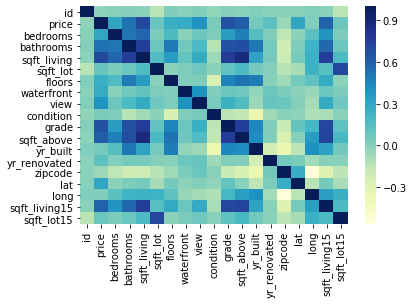

In [10]:
ax = sns.heatmap(correlations_initial, cmap="YlGnBu")

This gives us a heatmap of the pariwise correlation for all the columns in the dataframe. The darker the blue, the closer the correlation is to 1, and the stronger the strength of association is between two features.

Based on this, it seems that the following factors have a high correlation with the price of a house, and may be worth investigating further: 1) the number of bathrooms a house has; 2) the area of a home in sqft; 3) the grade of a house; 4) the area of a house in sqft minus the basement; 5) the areas of a house's nearest 15 neighbours in sqft.

We must, however, be wary of variables which have a high degree of correlation between themselves because they are repetitions of the same kind of information (or subsets of each other). Inclusion of such factors together will have a negative effect on our final model, since their influence will be amplified and their combined weight will cause the model to over-estimate their importance when calculating their influence on the target (sales price).

Looking at the five factors above, we therefore cannot include both the area of a home in sqft and the area of a home in sqft minus the basement in our model.
Given that having a basement may be an attractive feature to potential buyers, we might want to investigate this further. It therefore seems that using the area of a home in sqft (including the basement) is a valuable factor to include in our final model.
We can carry out further investigations to see whether, and how much, having a basement influences the sales price of a house.

Based on the pairwise correlation above, we will focus on the following questions:

1) How much does the number of bathrooms in a house influence the sales price?

2) How much does the grade of a house influence its sales price?

3) How much does the area of a house in square feet influence the sales price?

We will be investigating each of these factors in turn and will examine them in light of other factors.

**Looking at each factor individually and plotting some initial visualisations based on our hypotheses and pairwise correlation.**

**Date** - Entries in the date column (the date each house was sold) are in the format month-day-year. It may be useful to convert these dates into years only.

**Price** The range of values within the price column is huge: the minimum price in the dataframe is USD 78000 (given that our data is from King County, we can assume our prices are listed in USD), whilst the maximum price is USD 77000000. We will need to make sure to remove outliers from our data when cleaning it.

In [12]:
df['price'].isna().sum()

0

In [13]:
(df['price'].value_counts()).head()

350000.0    172
450000.0    172
550000.0    159
500000.0    152
425000.0    150
Name: price, dtype: int64

We may need to consider adding a new column to the df and adding price ranges to it which are a little easier to manipulate.

**Bedrooms** At first glance, there seems to be one clear outlier in the  bedrooms column: one house has 33 bedrooms. One would expect this house to be extremely expensive, and very big. However, looking at that particular row demonstrates that its price is not at the higher end of the range of house prices (it is only USD 100000 more than the average house price). We can safely assume that this is an anomaly.

In [14]:
df.loc[df['bedrooms'] == 33]

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
15856,2402100895,6/25/2014,640000.0,33,1.75,1620,6000,1.0,0.0,0.0,...,7,1040,580.0,1947,0.0,98103,47.6878,-122.331,1330,4700


In [15]:
df['bedrooms'].isna().sum()

0

In [16]:
df['bedrooms'].value_counts()

3     9824
4     6882
2     2760
5     1601
6      272
1      196
7       38
8       13
9        6
10       3
11       1
33       1
Name: bedrooms, dtype: int64

**Bathrooms** The values in the bathrooms column describe the number of bathrooms per bedroom per house. To calculate the number of bathrooms in a house, we could add a new column to the dataframe and simply multiply the number of bathrooms per bedroom per house. It is possible, however, that the number of bathrooms and bedrooms will be highly related (independent of the price), and we may not need to investigate both at the same time.

In [ ]:
CALCULATE NEW COLUMN HERE FOR NuMBER of BAthROOMS

**Floors** Some of the values in the floor column seem a little strange - the highest number of floors in a house is 3.5, suggesting that some houses may have mezzanines in them.

**Waterfront** This tells us whether a property has a view of the waterfront or not. However, given the mean of this feature, it seems that very few properties have a view of the waterfront. Looking at the value counts for the entries for waterfront in the dataframe, this is confirmed.

In [18]:
df['waterfront'].isna().sum()

2376

In [19]:
df['waterfront'].value_counts()

0.0    19075
1.0      146
Name: waterfront, dtype: int64

We can assume that '1' = waterfront view and '0' = no waterfront view (since having a waterfront view is a rare and a sought-after property).

Firstly, 2376 values for the waterfront column are missing. We may need to replace these later with a meaningful value during data cleaning. 

Secondly, only 146 of the remaining houses have a view of the waterfront, whilst 19075 don't. This seems strange, given the location of King County: it is located along Elliott Bay. Moreover, it is probable that this feature won't be as useful as thought, since such a small proportion of properties has a view of the waterfront.

In [ ]:
TABLE MEAN WATERFRONT AND YES NO WT

**View** The view column tells us whether the property has been viewed or not. However, the values included for this factor are not straightforward.

In [20]:
df['view'].isna().sum()

63

In [21]:
df['view'].value_counts()

0.0    19422
2.0      957
3.0      508
1.0      330
4.0      317
Name: view, dtype: int64

It could be that the column tells us how many times a property has been viewed. We might expect a property with a high number of views to be less desirable and harder to sell.

**Condition** This tells us how good the condition of the house is overall. We can assume that the higher the associated value, the better the condition the house is in.

In [22]:
df['condition'].value_counts()

3    14020
4     5677
5     1701
2      170
1       29
Name: condition, dtype: int64

In [23]:
df['condition'].isna().sum()

0

In [24]:
df_price_condition = df[['price', 'condition']]

df_price_condition.head()

,price,condition
0,221900.0,3
1,538000.0,3
2,180000.0,3
3,604000.0,5
4,510000.0,3


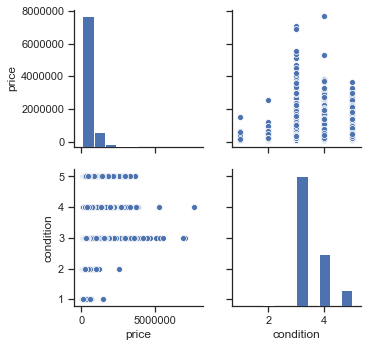

In [25]:
sns.set(style="ticks", color_codes=True)

g = sns.pairplot(df_price_condition)

These pairplots indicate that our assumption is correct: the higher the condition, the higher the price of a house.

**Grade** This tells us the grade of each house according to the King County grading system. Again, we can assume that the higher the grade is, the more valuable a property will be.

In [26]:
df_price_grade = df[['price', 'grade']]

df_price_grade.head()

,price,grade
0,221900.0,7
1,538000.0,7
2,180000.0,6
3,604000.0,7
4,510000.0,8


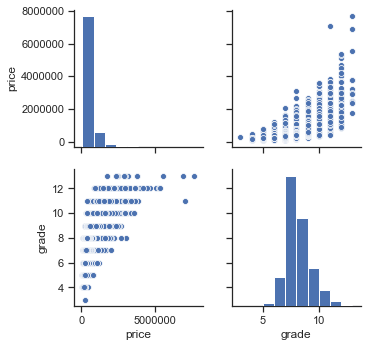

In [27]:
sns.set(style="ticks", color_codes=True)

g = sns.pairplot(df_price_grade)

The relationship between price and grade is even stronger than the relationship between price and condition: the higher the grade of the house, the higher its price.

**Sqft above** describes the total area of the house, minus the area of the basement. We could assume that the larger the area of the house, the higher the price of the house.

In [28]:
df['sqft_above'].isna().sum()

0

**Sqft_basement** describes the total area of the basement of a house. Not all houses will have basements, and those which do not have basements we will assume will have a value of '0' in this column. We can see below that there are some values which are missing for this factor, as noted by the '?' value.

In [29]:
df['sqft_basement'].isna().sum()

0

In [30]:
df['sqft_basement'].value_counts()

0.0       12826
?           454
600.0       217
500.0       209
700.0       208
800.0       201
400.0       184
1000.0      148
300.0       142
900.0       142
200.0       105
750.0       104
480.0       103
530.0       103
450.0       103
720.0        98
620.0        90
580.0        84
840.0        83
420.0        81
860.0        79
670.0        78
1100.0       78
780.0        76
550.0        76
650.0        75
240.0        74
380.0        73
680.0        73
850.0        72
          ...  
2720.0        1
862.0         1
2360.0        1
2850.0        1
243.0         1
2490.0        1
2250.0        1
1284.0        1
1281.0        1
295.0         1
506.0         1
2500.0        1
602.0         1
65.0          1
1135.0        1
1770.0        1
2050.0        1
1913.0        1
176.0         1
2580.0        1
704.0         1
143.0         1
3480.0        1
666.0         1
792.0         1
4130.0        1
274.0         1
1990.0        1
1920.0        1
652.0         1
Name: sqft_basement, Len

**Yr_built** describes the year a house was built. We don't yet know whether/how this factor will influence the price of a house - perhaps a house built a long time ago will have some value, as long as its condition is not too low or if it has been recently renovated.

In [31]:
df['yr_built'].value_counts()

2014    559
2006    453
2005    450
2004    433
2003    420
2007    417
1977    417
1978    387
1968    381
2008    367
1967    350
1979    343
1959    334
1990    317
1962    312
2001    305
1954    305
1987    294
1989    290
1969    280
1955    271
1988    270
1947    263
1999    263
1963    255
1976    253
1966    249
1994    249
1950    249
1960    248
       ... 
1909     94
1906     92
1930     90
1919     88
1900     87
1908     86
1923     84
1912     79
1916     79
1921     76
1905     74
1911     73
1937     68
1907     65
1915     64
1931     61
1913     58
1917     56
1914     54
1938     52
1903     46
1904     45
1936     40
1932     38
2015     38
1933     30
1901     29
1902     27
1935     24
1934     21
Name: yr_built, Length: 116, dtype: int64

In [32]:
df['yr_built'].isna().sum()

0

**Yr_renovated** tells us the year a house has been renovated, if at all. We can assume that '0' suggests the house has never been renovated.

In [33]:
df['yr_renovated'].value_counts()

0.0       17011
2014.0       73
2003.0       31
2013.0       31
2007.0       30
2000.0       29
2005.0       29
1990.0       22
2004.0       22
2009.0       21
1989.0       20
2006.0       20
2002.0       17
1991.0       16
1998.0       16
1984.0       16
1999.0       15
2008.0       15
2010.0       15
2001.0       15
1983.0       15
2015.0       14
1985.0       14
1986.0       14
1987.0       14
1994.0       14
1992.0       13
1993.0       12
1997.0       12
1995.0       12
          ...  
1975.0        5
1964.0        5
1969.0        4
1963.0        4
1973.0        4
1981.0        4
1965.0        4
1978.0        3
1960.0        3
1958.0        3
1956.0        3
1955.0        3
1945.0        3
1972.0        3
1967.0        2
1957.0        2
1940.0        2
1974.0        2
1962.0        2
1953.0        1
1950.0        1
1934.0        1
1944.0        1
1976.0        1
1948.0        1
1946.0        1
1959.0        1
1971.0        1
1951.0        1
1954.0        1
Name: yr_renovated, Leng

In [34]:
df['yr_renovated'].isna().sum()

3842

**Zipcode** The zipcode of a property will tell us where the property is located. Some zipcodes will be more in demand than others, as they are more attractive areas to live than others. To work with this factor, we may need to find a way to group the zipcodes together by larger area, in order to make our data more manageable (we could do this using the **longitude** and **latitude** figures we are given, for example).

In [35]:
df['zipcode'].value_counts()

98103    602
98038    589
98115    583
98052    574
98117    553
98042    547
98034    545
98118    507
98023    499
98006    498
98133    493
98059    468
98058    455
98155    446
98074    441
98033    432
98027    412
98125    409
98056    406
98053    403
98001    361
98075    359
98126    354
98092    351
98144    343
98106    335
98116    330
98029    321
98199    317
98004    317
        ... 
98112    269
98168    269
98055    268
98107    266
98136    263
98178    262
98030    256
98177    255
98166    254
98022    233
98105    229
98045    220
98002    199
98077    198
98011    195
98019    190
98108    186
98119    184
98005    168
98007    141
98188    136
98032    125
98014    124
98070    117
98109    109
98102    104
98010    100
98024     80
98148     57
98039     50
Name: zipcode, Length: 70, dtype: int64

In [36]:
df['zipcode'].isna().sum()

0

**Sqft_living** This factor tells us the square footage of the house living space for the nearest 15 neighbours for each house, whilst **sq_ft lot 15** tells us the size of the plot of land of the nearest 5 neighbours for each house.